In [177]:
import pandas as pd
import numpy as np

In [178]:
pd.set_option('display.max_columns',None)

In [179]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [180]:
df.shape

(7043, 21)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [182]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [183]:
df.drop(columns = 'customerID',inplace = True)

In [184]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [185]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [186]:
X = df.drop(columns='Churn')
y = df['Churn']

In [187]:
pd.DataFrame({
    'Features' : X.columns,
    'unique' : X.nunique(),
    'dtype' : X.dtypes
})

,Features,unique,dtype
gender,gender,2,object
SeniorCitizen,SeniorCitizen,2,int64
Partner,Partner,2,object
Dependents,Dependents,2,object
tenure,tenure,73,int64
PhoneService,PhoneService,2,object
MultipleLines,MultipleLines,3,object
InternetService,InternetService,3,object
OnlineSecurity,OnlineSecurity,3,object
OnlineBackup,OnlineBackup,3,object


In [ ]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())

In [189]:
# Binary categorical columns
binary_cols = X.select_dtypes(include='object').columns
for col in binary_cols:
  if X[col].nunique()==2:
    print(col)

gender
Partner
Dependents
PhoneService
PaperlessBilling


In [190]:
for col in binary_cols:
    if X[col].nunique() == 2:
        print(col, X[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']


In [191]:
binary_cols = [
    col for col in X.select_dtypes(include='object').columns
    if X[col].nunique() == 2
]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in binary_cols:
    X[col] = le.fit_transform(X[col])

In [192]:
# Identify multi-categorical columns
multi_cat_cols = [
    col for col in X.select_dtypes(include='object').columns
    if X[col].nunique() > 2
]

In [193]:
multi_cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [194]:
X = pd.get_dummies(
    X,
    columns=multi_cat_cols,
    drop_first=True
)

In [195]:
X.shape

(7043, 30)

In [196]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [197]:
df['Churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [198]:
# This cell is no longer needed after the fix in ac9aKuXJ_Omw

In [203]:
# This cell is no longer needed after the fix in ac9aKuXJ_Omw
# y = df['Churn'].map({
#     'yes': 1,
#     'true': 1,
#     'no': 0,
#     'false': 0
# })

In [202]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
y = df['Churn'].map({'no': 0, 'yes': 1})

In [204]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [205]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

,proportion
Churn,
0,0.734564
1,0.265436


In [206]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [207]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [208]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

In [209]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.7899219304471257
Precision: 0.6317567567567568
Recall   : 0.5
F1 Score : 0.5582089552238806


In [210]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[926, 109],
       [187, 187]])

In [211]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC :", roc_auc)

ROC-AUC : 0.8219987599782995


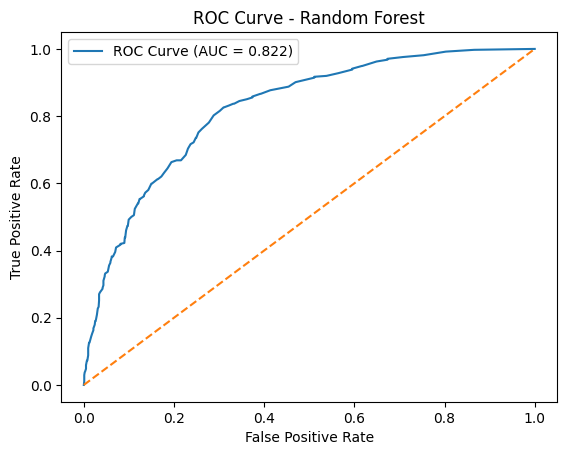

In [212]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [213]:
# Get feature importances from the trained model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(15)

,feature,importance
8,TotalCharges,0.191188
4,tenure,0.172108
7,MonthlyCharges,0.165766
11,InternetService_Fiber optic,0.042241
28,PaymentMethod_Electronic check,0.035889
26,Contract_Two year,0.033499
0,gender,0.028263
6,PaperlessBilling,0.026370
14,OnlineSecurity_Yes,0.024567
20,TechSupport_Yes,0.024433


In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',   # correct metric for churn
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)

In [ ]:
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

In [ ]:
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_best))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_best)